<a href="https://colab.research.google.com/github/gurukiran07/ML-DM_assignment_10/blob/master/ML_assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1st question 

In [27]:
import numpy as np

def roll_dice(prob=None):
    if not prob:
        return np.random.choice(a=[1,2,3,4,5,6])
    else:
        return np.random.choice(a=[1,2,3,4,5,6],p=prob)
           
def simulate(n=100,prob=None):
    reached=0
    for _ in range(n):
        throws=250
        curr_pos=0
        while throws:
            throws-=1
            curr_step=roll_dice(prob)
            if curr_pos>60:
                reached+=1
                break
                
            if curr_step in {1,2}:
                curr_pos-=1
            elif curr_step in {3,4,5}:
                curr_pos+=1
            else:
                curr_step=roll_dice(prob)
                curr_pos+=curr_step
    print(reached/n)
simulate() #without probability weights in 100 iterations
simulate(prob=[0.2,0.3,0.2,0.1,0.1,0.1]) #with probability wieghts in 100 iterations

simulate(1000)
simulate(1000,[0.2,0.3,0.2,0.1,0.1,0.1])

1.0
0.27
1.0
0.313


2nd question for generating random data for Multi-Linear regression

In [7]:
import numpy as np
import pandas as pd
import random
from scipy.stats import norm
random.seed(1)

#Y=b0+b1x1+b2x2 is the equation I choose
X = []
for i in range(2):
  X_i = norm.rvs(0, 1, 100)
  X.append(X_i)

eps = norm.rvs(0, 0.25,100)
y = 1 + (0.4 * X[0]) + eps + (0.5 * X[1])
data_mlr = {'X0': X[0],'X1':X[1]}
df = pd.DataFrame(data_mlr)
print(df)

          X0        X1
0   0.369552  0.779947
1   1.163930  0.604504
2   0.300996  1.066067
3  -0.825043 -0.661056
4  -2.059470 -0.059195
..       ...       ...
95  0.213498  0.540622
96 -0.190058 -0.486068
97  1.033094  1.376090
98  0.410708 -0.873619
99 -0.407294  0.867856

[100 rows x 2 columns]


Data for logistic regression

In [11]:
n_features = 4
X = []
for i in range(n_features):
  X_i = norm.rvs(0, 1, 100)
  X.append(X_i)
a1 = (np.exp(1 + (0.5 * X[0]) + (0.4 * X[1]) + (0.3 * X[2]) + (0.5 * X[3]))/(1 + np.exp(1 + (0.5 * X[0]) + (0.4 * X[1]) + (0.3 * X[2]) + (0.5 * X[3]))))
print(a1)
y1 = []
for i in a1:
  if (i>=0.5):
    y1.append(1)
  else:
    y1.append(0)
print(y1)
data_lr = {'X0': X[0],'X1':X[1],'X2':X[2],'X3':X[3],'Y': y1 }
df1 = pd.DataFrame(data_lr)

b [0.30880303 0.7337115  0.69889009 0.74075708 0.70260517 0.68546272
 0.84762149 0.74513035 0.61821704 0.60589912 0.82991653 0.73800817
 0.9299364  0.58539724 0.82403134 0.8649083  0.83649298 0.70147634
 0.82635278 0.83562812 0.78838681 0.69731242 0.79069812 0.60182153
 0.74561275 0.38591747 0.79045747 0.76113391 0.27432383 0.86503819
 0.8574701  0.31995949 0.89952603 0.79567448 0.93053225 0.51314203
 0.73330346 0.87020897 0.63377642 0.86234147 0.63780163 0.86817221
 0.92306364 0.63437663 0.57656665 0.71488831 0.85614035 0.67750849
 0.76208914 0.85628856 0.60058045 0.63843423 0.7320992  0.77137729
 0.51333266 0.83124807 0.61377641 0.71916643 0.45745993 0.43666675
 0.60315308 0.66823406 0.77848336 0.73238641 0.74694599 0.58845574
 0.5844417  0.59657871 0.88090672 0.85276876 0.76278731 0.73920121
 0.87744997 0.85224826 0.86559393 0.5334163  0.51279681 0.55604821
 0.56493397 0.60536159 0.75366379 0.72623349 0.81653291 0.56232796
 0.54665256 0.75172575 0.83977682 0.43027127 0.72431198 0.84

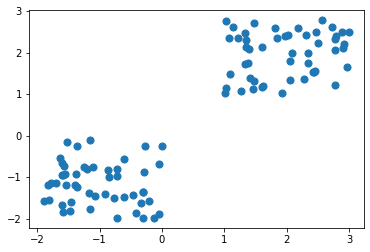

         X0        X1
0 -0.130010 -1.977425
1 -0.467466 -1.433920
2 -0.718754 -0.798148
3 -0.770415 -1.488043
4 -1.069109 -1.455664
          X0        X1
95  2.280177  1.371877
96  2.720285  2.614918
97  2.050779  1.349027
98  1.274484  1.068222
99  2.993219  2.496031
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      100 non-null    float64
 1   X1      100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None
               X0          X1
count  100.000000  100.000000
mean     0.470622    0.403235
std      1.619181    1.652361
min     -1.889603   -1.977425
25%     -1.148795   -1.186840
50%      0.506388    0.454639
75%      1.984809    2.093348
max      2.993219    2.777947


In [13]:
import matplotlib.pyplot as plt
X_a= -2 * np.random.rand(100,2)
X_b = 1 + 2 * np.random.rand(50,2)
X_a[50:100, :] = X_b
plt.scatter(X_a[ : , 0], X_a[ :, 1], s = 50)
plt.show()
data_kmeans = {'X0': X_a[:,0],'X1':X_a[:,1]}
df3 = pd.DataFrame(data_kmeans)

In [17]:
#Linear regression using gradient descent
X = df.iloc[:,0].values
y = df.iloc[:,1].values
b1 = 0
b0 = 0
l = 0.001
epochs = 100
 
n = float(len(X))
for i in range(epochs):
  y_p = b1*X + b0
  loss = np.sum(y_p - y1)**2
  d1 = (-2/n) * sum(X * (y - y_p))
  d0 = (-2/n) * sum(y - y_p)
  b1 = b1 - (l*d1)
  b0 = b0 - (l*d0)

print(b1,b0)

-0.008845771894271406 -0.0023882343069114953


In [18]:
#Logistic regression using gradient descent

X1 = df1.iloc[:,0:4].values
y1 = df1.iloc[:,4].values

def sigmoid(Z):
  return 1 /(1+np.exp(-Z))

def loss(y1,y_hat):
  return -np.mean(y1*np.log(y_hat) + (1-y1)*(np.log(1-y_hat)))

W = np.zeros((4,1))
b = np.zeros((1,1))

m = len(y1)
lr = 0.001
for epoch in range(1000):
  Z = np.matmul(X1,W)+b
  A = sigmoid(Z)
  logistic_loss = loss(y1,A)
  dz = A - y1
  dw = 1/m * np.matmul(X1.T,dz)
  db = np.sum(dz)

  W = W - lr*dw
  b = b - lr*db

  if epoch % 100 == 0:
    print(logistic_loss)


0.6931471805599453
0.3022173234998066
0.30190091328327545
0.3015885735947497
0.3012802865933211
0.30097603467844736
0.3006758004199506
0.300379566489791
0.3000873155957687
0.29979903041730716


In [20]:
#Using L1 regularization

X = df.iloc[:,0].values
y = df.iloc[:,1].values
b1 = 0
b0 = 0
l = 0.001
epochs = 100
lam = 0.1
 
n = float(len(X))
for i in range(epochs):
  y_p = b1*X + b0
  loss = np.sum(y_p - y1)**2 + (lam * b1)
  d1 = (-2/n) * sum(X * (y - y_p)) + lam
  d0 = (-2/n) * sum(y - y_p)
  b1 = b1 - (l*d1)
  b0 = b0 - (l*d0)

print(b1,b0)

-0.018073900836399873 -0.0025641845490483096


In [21]:
#using L2 regularization

X = df.iloc[:,0].values
y = df.iloc[:,1].values
b1 = 0
b0 = 0
l = 0.001
epochs = 100
lam = 0.1
 
n = float(len(X))
for i in range(epochs):
  y_p = b1*X + b0
  loss = np.sum(y_p - y1)**2 + ((lam/2) * b1)
  d1 = (-2/n) * sum(X * (y - y_p)) + (lam *b1)
  d0 = (-2/n) * sum(y - y_p)
  b1 = b1 - (l*d1)
  b0 = b0 - (l*d0)

print(b1,b0)


-0.00880333627433873 -0.0023876912527277237


In [22]:
#Logistic regression using L1 regularization

X1 = df1.iloc[:,0:4].values
y1 = df1.iloc[:,4].values
lam = 0.1
def sigmoid(Z):
  return 1 /(1+np.exp(-Z))

def loss(y1,y_hat):
  return -np.mean(y1*np.log(y_hat) + (1-y1)*(np.log(1-y_hat))) + (lam * (np.sum(W)))

W = np.zeros((4,1))
b = np.zeros((1,1))

m = len(y1)
lr = 0.001
for epoch in range(1000):
  Z = np.matmul(X1,W)+b
  A = sigmoid(Z)
  logistic_loss = loss(y1,A)
  dz = A - y1
  dw = 1/m * np.matmul(X1.T,dz) + lam
  db = np.sum(dz)

  W = W - lr*dw
  b = b - lr*db

  if epoch % 100 == 0:
    print(logistic_loss)


0.6931471805599453
-0.09640990798816362
-0.4927659784948356
-0.886502285162289
-1.277646280055366
-1.666225487762878
-2.0522674815564446
-2.43579986109002
-2.816850231567876
-3.1954461843057187


In [23]:
#Logistic regression using L2 regularization

X1 = df1.iloc[:,0:4].values
y1 = df1.iloc[:,4].values
lam = 0.1
def sigmoid(Z):
  return 1 /(1+np.exp(-Z))

def loss(y1,y_hat):
  return -np.mean(y1*np.log(y_hat) + (1-y1)*(np.log(1-y_hat))) + (lam * (np.sum(np.square(W))))

W = np.zeros((4,1))
b = np.zeros((1,1))

m = len(y1)
lr = 0.001
for epoch in range(1000):
  Z = np.matmul(X1,W)+b
  A = sigmoid(Z)
  logistic_loss = loss(y1,A)
  dz = A - y1
  dw = 1/m * np.matmul(X1.T,dz) + lam * W
  db = np.sum(dz)

  W = W - lr*dw
  b = b - lr*db

  if epoch % 100 == 0:
    print(logistic_loss)


0.6931471805599453
0.3025362764303077
0.3031560134924925
0.3043667985322026
0.3061393919329178
0.3084455414335884
0.3112579541110236
0.3145502694268321
0.3182970332625104
0.32247367287146034


In [0]:
#K-mean algo using OOPS

class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in X:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
        
colors = 10*["g","r","c","b","k"]

147.42290798680955
189.59459485241516
506.0874490348583
14.224835870066286


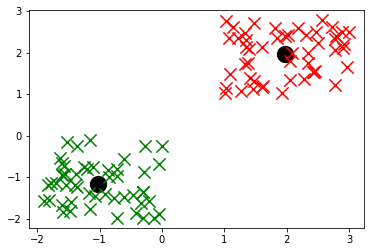

In [25]:
X = df3.iloc[:,0:2].values
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

In [0]:
#Using OOPS 
import numpy as np

class LinearRegressionModel():

    def __init__(self, dataset, learning_rate, num_iterations):
        self.dataset = np.array(dataset)
        self.b = 0  
        self.m = 0  
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.M = len(self.dataset)
        self.total_error = 0

    def apply_gradient_descent(self):
        for i in range(self.num_iterations):
            self.do_gradient_step()

    def do_gradient_step(self):
        b_summation = 0
        m_summation = 0
        for i in range(self.M):
            x_value = self.dataset[i, 0]
            y_value = self.dataset[i, 1]
            b_summation += (((self.m * x_value) + self.b) - y_value) 
            m_summation += (((self.m * x_value) + self.b) - y_value) * x_value
        self.b = self.b - (self.learning_rate * (1/self.M) * b_summation)
        self.m = self.m - (self.learning_rate * (1/self.M) * m_summation)
      
    def compute_error(self):
        for i in range(self.M):
            x_value = self.dataset[i, 0]
            y_value = self.dataset[i, 1]
            self.total_error += ((self.m * x_value) + self.b) - y_value
        return self.total_error

    def __str__(self):
        return "Results: b: {}, m: {}, Final Total error: {}".format(round(self.b, 2), round(self.m, 2), round(self.compute_error(), 2))

    def get_prediction_based_on(self, x):
        return round(float((self.m * x) + self.b), 2) # Type: Numpy float.

def main():
    school_dataset = np.genfromtxt(DATASET_PATH, delimiter=",")
    lr = LinearRegressionModel(school_dataset, 0.0001, 1000)
    lr.apply_gradient_descent()
    hours = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    for hour in hours:
        print("Studied {} hours and got {} points.".format(hour, lr.get_prediction_based_on(hour)))
    print(lr)

if __name__ == "__main__": main()

In [0]:
#Logistic regression in OOPS
class LogisticRegression:
  def __init__(self, learning_rate, num_iters, fit_intercept = True, verbose = False):
    self.learning_rate = learning_rate
    self.num_iters = num_iters
    self.fit_intercept = fit_intercept
    self.verbose = verbose
  def __add_intercept(self, X):
    intercept = np.ones((X.shape[0],1))
    return np.concatenate((intercept,X),axis=1)
  def __sigmoid(self,z):
    return 1/(1+np.exp(-z))
  def __loss(self, h, y):
    return (-y * np.log(h) - (1-y) * np.log(1-h)).mean()
  
  def fit(self,X,y):
    if self.fit_intercept:
      X = self.__add_intercept(X)
    self.theta = np.zeros(X.shape[1])
    
    for i in range(self.num_iters):
      z = np.dot(X,self.theta)
      h = self.__sigmoid(z)
      gradient = np.dot(X.T,(h-y))/y.size
      
      self.theta -= self.learning_rate * gradient
      
      z = np.dot(X,self.theta)
      h = self.__sigmoid(z)
      loss = self.__loss(h,y)
      
      if self.verbose == True and i % 1000 == 0:
        print(f'Loss: {loss}\t')
  def predict_probability(self,X):
    if self.fit_intercept:
      X = self.__add_intercept(X)
    return self.__sigmoid(np.dot(X,self.theta))
  def predict(self,X):
    return (self.predict_probability(X).round())